# Missing values, normalisation, classifier evaluation

In [1]:
import numpy as np

## Exercise 1

Given dataset (as an Numpy array) that contains  records about 50 persons: (Gender, Height, Weight, Index).
- Gender = 0 (Male); 1 (Female) (binary)
- Height = person's height in cm (integer)
- Weight = person's weight in kg (integer)
- Index = 0 - Extremely Weak; 1 - Weak; 2 - Normal; 3 - Overweight; 4 - Obesity; 5 - Extreme Obesity (integer from 0 to 5)

In [2]:
dataset = np.array(
    [
        [0, 174, -1, 4],
        [0, 189, 87, 2],
        [1, 185, 110, 4],
        [1, 195, 104, 3],
        [0, 149, 61, 3],
        [0, 1893, 104, 3],
        [0, 147, 92, 5],
        [0, 154, 111, 5],
        [0, 174, 2, 3],
        [10, 169, 103, 4],
        [0, 195, 81, 2],
        [-1, 159, 80, 4],
        [1, 192, 101, 3],
        [0, 155, 51, 2],
        [0, 191, 379, 2],
        [1, 4, 107, 5],
        [1, 157, 110, 5],
        [0, 140, 129, 5],
        [0, 144, 145, 5],
        [0, 172, 139, -5],
        [0, 157, 110, 5],
        [1, 153, 149, 5],
        [1, 169, 97, 4],
        [0, 185, 139, 5],
        [1, 172, 67, 2],
        [1, 151, 64, 3],
        [0, 190, 95, 3],
        [0, 187, 62, 1],
        [1, 163, 159, 5],
        [0, 179, 152, 5],
        [0, 153, 121, 5],
        [0, 178, 52, 1],
        [1, 195, 65, 1],
        [1, 160, 131, 5],
        [1, 157, 153, 5],
        [1, 189, 132, 4],
        [1, 197, 114, 3],
        [0, 144, 80, 4],
        [1, 171, 152, 5],
        [1, 185, 81, 2],
        [1, 175, 120, 4],
        [1, 149, 108, 5],
        [0, 157, 56, 2],
        [0, 161, 118, 5],
        [1, 182, 126, 4],
        [0, 185, 76, 2],
        [1, 188, 122, 4],
        [0, 181, 111, 4],
        [0, 161, 72, 3],
        [0, 140, 152, 5],
    ]
)

1. Output the records with noisy data, i.e., records where values of some features are most likely incorrect (you can assume that Height should be in the range $[50,220]$, and Weight in the range $[50, 160]$)

In [3]:
# 第二列的范围是[50, 220]
mask_height = (dataset[:, 1] < 50) | (dataset[:, 1] > 220)

# 第三列的范围是[50, 160]
mask_weight = (dataset[:, 2] < 50) | (dataset[:, 2] > 160)

print(dataset[mask_height | mask_weight])

[[   0  174   -1    4]
 [   0 1893  104    3]
 [   0  174    2    3]
 [   0  191  379    2]
 [   1    4  107    5]]


2. Create a new dataset where noisy records (those that were identified as noisy in the previous step) are removed

In [4]:
# Remove noisy data
dataset_clean = dataset[~(mask_height | mask_weight)]
print(dataset_clean)

[[  0 189  87   2]
 [  1 185 110   4]
 [  1 195 104   3]
 [  0 149  61   3]
 [  0 147  92   5]
 [  0 154 111   5]
 [ 10 169 103   4]
 [  0 195  81   2]
 [ -1 159  80   4]
 [  1 192 101   3]
 [  0 155  51   2]
 [  1 157 110   5]
 [  0 140 129   5]
 [  0 144 145   5]
 [  0 172 139  -5]
 [  0 157 110   5]
 [  1 153 149   5]
 [  1 169  97   4]
 [  0 185 139   5]
 [  1 172  67   2]
 [  1 151  64   3]
 [  0 190  95   3]
 [  0 187  62   1]
 [  1 163 159   5]
 [  0 179 152   5]
 [  0 153 121   5]
 [  0 178  52   1]
 [  1 195  65   1]
 [  1 160 131   5]
 [  1 157 153   5]
 [  1 189 132   4]
 [  1 197 114   3]
 [  0 144  80   4]
 [  1 171 152   5]
 [  1 185  81   2]
 [  1 175 120   4]
 [  1 149 108   5]
 [  0 157  56   2]
 [  0 161 118   5]
 [  1 182 126   4]
 [  0 185  76   2]
 [  1 188 122   4]
 [  0 181 111   4]
 [  0 161  72   3]
 [  0 140 152   5]]


3. In the cleaned dataset, compute the means (i.e., average) of Height and Weight features (rounded to the nearest integer)

In [5]:
means_height = np.mean(dataset_clean[:, 1])
means_weight = np.mean(dataset_clean[:, 2])

print(means_height, means_weight)

169.24444444444444 105.33333333333333


4. Plot the data points from the cleaned dataset: For every record, plot the point with coordinates (Height, Weight), i.e. Height is along the X-axis and Weight is along the Y-axis. Use different colors/shapes of points for records with different value of Index. Can you see separation between the classes of objects with different values of Index?

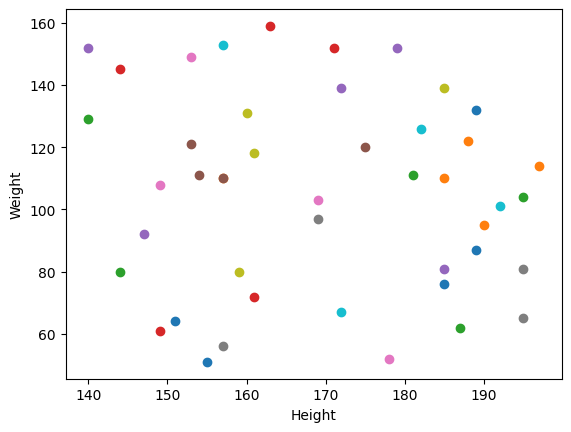

In [6]:
# For every record, plot the point with coordinates (Height, Weight), 
# i.e. Height is along the X-axis and Weight is along the Y-axis. 
# Use different colors/shapes of points for records with different value of Index. 

import matplotlib.pyplot as plt

# Plot the data points
for record in dataset_clean:
    height = record[1]
    weight = record[2]
    index = record[3]
    plt.scatter(height, weight)

plt.xlabel('Height')
plt.ylabel('Weight')

plt.show()



---

## Exercise 2

Given a dataset of objects with 2 features, create new datasets where both features are normalised.

In [7]:
dataset2 = np.array(
    [
        [116.87714213, 22.38724318],
        [98.05089468, 17.70419866],
        [121.91732905, 20.76950035],
        [150.60375643, 20.44777321],
        [116.15969721, 20.22792041],
        [175.55264595, 21.02920868],
        [130.2102414, 22.23461658],
        [117.79758934, 21.54449521],
        [199.05450964, 20.53902401],
        [155.00458477, 20.67588878],
        [160.27851623, 20.30877322],
        [142.49587465, 18.75387901],
        [167.32252309, 21.2040159],
        [178.11489609, 19.52285308],
        [135.76602655, 18.01816954],
        [117.62628615, 20.95436217],
        [171.74626081, 20.37269529],
        [130.11860385, 19.56387712],
        [122.68044125, 21.48927022],
        [159.43238282, 21.38030275],
        [108.78123817, 19.86203164],
        [152.70729255, 21.24708246],
        [143.64358057, 21.40357256],
        [209.68785285, 19.65378059],
        [133.08486628, 19.23372601],
        [138.2204662, 20.37983756],
        [143.65610499, 19.92235183],
        [143.29146765, 20.56157279],
        [106.79099845, 19.35181412],
        [208.89304694, 19.9697894],
        [183.55451445, 20.36281171],
        [144.46962995, 19.83011097],
        [174.87583233, 20.25079178],
        [137.33207546, 21.02909898],
        [187.74834101, 20.23883521],
        [127.59840561, 21.7328862],
        [110.15966458, 19.29460209],
        [130.82208863, 18.98107528],
        [166.72373008, 20.63258552],
        [154.50866392, 21.05583445],
        [190.93412702, 21.08776453],
        [148.62481651, 19.40248102],
        [115.50503568, 18.39916603],
        [155.39233722, 20.23610734],
        [146.44242825, 20.30917973],
        [114.21209804, 19.10945672],
        [140.4159023, 19.96369514],
        [140.82108456, 20.05603083],
        [129.50278428, 18.92210224],
        [174.88635445, 19.03980704],
    ]
)

1. Normalise features with $[0,1]$-scaling

In [8]:
print(np.min(dataset2, axis=0))
print(np.max(dataset2, axis=0))

# 最小-最大归一化 Min-Max Normalization (特征缩放 Features Scaling)
# dataset2 - np.min(dataset2, axis=0): 确保最小值为0
# (np.max(dataset2, axis=0) - np.min(dataset2, axis=0): 分布范围
dataset_MinMaxNormalization = (dataset2 - np.min(dataset2, axis=0)) / (np.max(dataset2, axis=0) - np.min(dataset2, axis=0))

print(dataset_MinMaxNormalization)


[98.05089468 17.70419866]
[209.68785285  22.38724318]
[[0.16863813 1.        ]
 [0.         0.        ]
 [0.21378614 0.65455318]
 [0.47074788 0.58585276]
 [0.16221154 0.5389062 ]
 [0.69423023 0.71001034]
 [0.28807079 0.96740868]
 [0.17688313 0.82004272]
 [0.90475069 0.60533812]
 [0.51016877 0.63456371]
 [0.55741058 0.55617121]
 [0.39812066 0.22414486]
 [0.62050802 0.74733802]
 [0.71718186 0.38834874]
 [0.33783733 0.06704418]
 [0.17534866 0.69402789]
 [0.66013413 0.5698209 ]
 [0.28724994 0.39710886]
 [0.2206218  0.80825018]
 [0.54983125 0.78498167]
 [0.0961182  0.46077567]
 [0.48959053 0.7565343 ]
 [0.40840136 0.78995062]
 [1.         0.41630651]
 [0.31382055 0.32660961]
 [0.35982324 0.57134603]
 [0.40851355 0.47365622]
 [0.40524727 0.6101531 ]
 [0.07829041 0.35182571]
 [0.99288044 0.48378586]
 [0.76590782 0.56771039]
 [0.41580079 0.45395945]
 [0.6881676  0.54379007]
 [0.35186538 0.70998691]
 [0.80347447 0.54123691]
 [0.26467499 0.86027103]
 [0.1084656  0.33960886]
 [0.29355148 0.272659

2. Normalise features with Gaussian normalisation

In [9]:
# Calculate the mean and standard deviation of each feature
mean = np.mean(dataset2, axis=0)
std = np.std(dataset2, axis=0)

# Apply Gaussian normalization
dataset_Gaussian = (dataset2 - mean) / std

print(dataset_Gaussian)


[[-1.09940793  2.15253936]
 [-1.79571966 -2.48367468]
 [-0.91299047  0.55097397]
 [ 0.14801204  0.2324641 ]
 [-1.12594351  0.01480983]
 [ 1.07077715  0.80808521]
 [-0.60626699  2.00143903]
 [-1.06536407  1.31821887]
 [ 1.94002225  0.32280239]
 [ 0.31078204  0.45829852]
 [ 0.50584483  0.09485411]
 [-0.15186786 -1.44449114]
 [ 0.76637602  0.98114436]
 [ 1.1655451  -0.68320682]
 [-0.4007795  -2.17284351]
 [-1.07169993  0.73398717]
 [ 0.92999336  0.15813696]
 [-0.60965632 -0.64259302]
 [-0.88476584  1.26354613]
 [ 0.47454956  1.15566834]
 [-1.39884482 -0.34742005]
 [ 0.22581389  1.02378025]
 [-0.10941856  1.17870545]
 [ 2.33330942 -0.55358858]
 [-0.49994548 -0.96944262]
 [-0.30999906  0.16520781]
 [-0.10895532 -0.28770306]
 [-0.12244188  0.34512569]
 [-1.47245626 -0.85253539]
 [ 2.30391256 -0.24073987]
 [ 1.36673602  0.14835222]
 [-0.07886611 -0.37902151]
 [ 1.04574438  0.03745249]
 [-0.34285727  0.80797661]
 [ 1.52184981  0.02561548]
 [-0.70286893  1.50472595]
 [-1.34786204 -0.9091753 ]
 

3. In three different plots show the original data, $[0,1]$-normilised, and Gaussian normalised data.

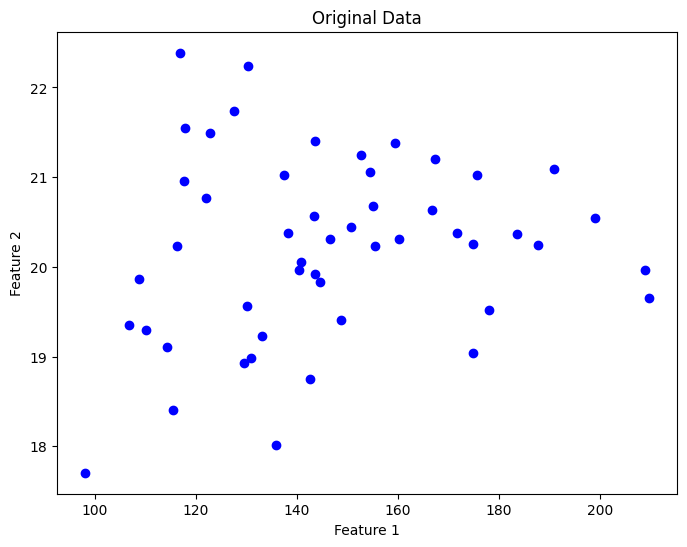

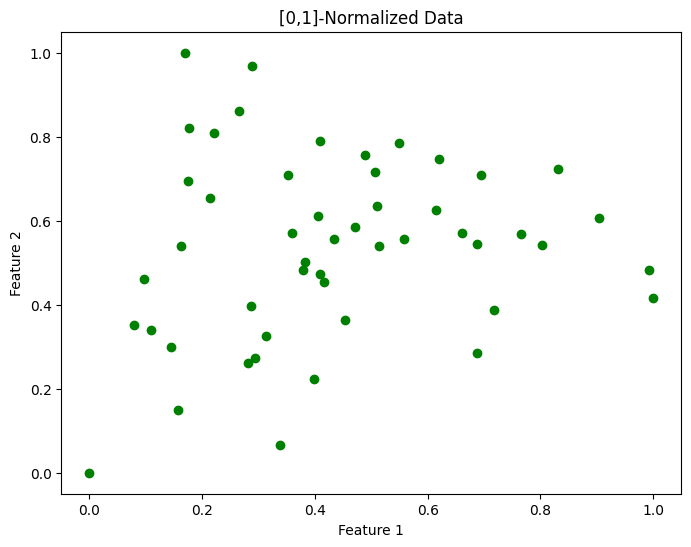

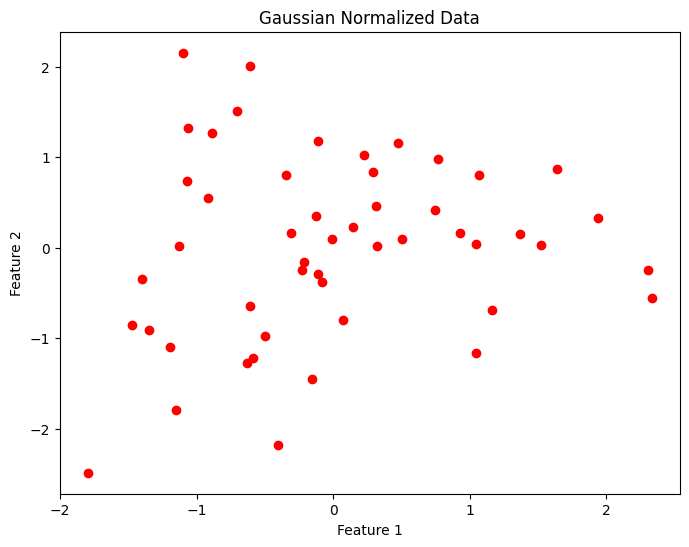

In [10]:
import matplotlib.pyplot as plt

# Plot the original data
plt.figure(figsize=(8, 6))
plt.scatter(dataset2[:, 0], dataset2[:, 1], color='blue')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot the [0,1]-normalized data
plt.figure(figsize=(8, 6))
plt.scatter(dataset_MinMaxNormalization[:, 0], dataset_MinMaxNormalization[:, 1], color='green')
plt.title('[0,1]-Normalized Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot the Gaussian normalized data
plt.figure(figsize=(8, 6))
plt.scatter(dataset_Gaussian[:, 0], dataset_Gaussian[:, 1], color='red')
plt.title('Gaussian Normalized Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


---

## Exercise 3

Given training ($\texttt{y_true}$) and predicted ($\texttt{y_pred}$) data for binary classification, where 1 corresponds to the positive class and 0 corresponds to the negative class, compute
1. The number of True Positives, True Negatives, False Positives, False Negatives
2. Accuracy
3. Precision
4. Recall
5. F-score

In [11]:
y_true = np.array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [12]:
TP = np.sum((y_true == 1) & (y_pred == 1)) # 值为真, 预测也为真
TN = np.sum((y_true == 0) & (y_pred == 0)) # 值为假, 预测也为假
FP = np.sum((y_true == 0) & (y_pred == 1)) # 值为假, 预测为真
FN = np.sum((y_true == 1) & (y_pred == 0)) # 值为真, 预测为假

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 22
True Negatives: 15
False Positives: 5
False Negatives: 8


In [13]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy


0.74

In [14]:
precision = TP / (TP + FP)
precision

0.8148148148148148

In [15]:
recall = TP / (TP + FN)
recall

0.7333333333333333

In [16]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.7719298245614035

---

## Exercise 4

Given training and predicted data for 4-class classification, where classes are 0,1,2,3

In [17]:
y_true = np.array([1, 2, 3, 0, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 2, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 3, 2, 1, 1, 2, 1, 0, 3, 1, 2, 0, 0, 1,3, 2, 3, 3, 3, 0, 3, 1, 0, 1, 0, 2, 0, 3, 3, 3, 2, 0, 1, 3, 0, 1,3, 3, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 1, 2, 3, 2, 2, 3, 2, 2, 1, 1,2, 2, 0, 3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 3, 1, 0, 2, 0, 3, 3, 2,1, 0, 3, 2, 0, 1, 3, 1, 2, 1, 3, 2, 2, 2, 2, 3, 3, 3, 2, 0, 2, 2,2, 0, 2, 0, 0, 3, 0, 2, 2, 0, 1, 1, 2, 2, 3, 0, 1, 0, 1, 0, 0, 0,0, 0, 2, 2, 0, 3, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 2, 2, 3, 3, 1, 3,1, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 3, 0, 2, 1, 1, 1, 1, 3, 2, 1, 3,1, 0])
y_pred = np.array([1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 3, 1, 2, 1, 3, 2, 3, 1, 1, 2, 3, 0, 0, 1, 0, 1, 0, 2, 3, 2, 0, 1, 3, 1, 0, 0, 1, 3, 1, 0, 1,3, 3, 3, 3, 3, 1, 3, 1, 2, 2, 0, 2, 0, 3, 3, 3, 0, 2, 2, 3, 2, 2,3, 3, 2, 2, 1, 3, 3, 2, 3, 2, 3, 2, 2, 0, 3, 1, 2, 3, 3, 1, 2, 2,2, 2, 0, 3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 3, 2, 0, 2, 0, 3, 3, 2,1, 0, 3, 2, 0, 1, 3, 1, 2, 1, 0, 3, 2, 2, 0, 3, 3, 3, 2, 1, 2, 3,2, 0, 2, 0, 0, 3, 0, 2, 3, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0,0, 0, 2, 2, 0, 0, 3, 2, 3, 0, 0, 3, 3, 0, 1, 1, 2, 2, 3, 3, 2, 3,1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 3, 0, 2, 1, 1, 1, 1, 3, 3, 1, 3,1, 0])

1. Compute the confusion matrix, i.e. a 4x4 matrix $\overline{A}$, in which an element $\overline{A}_{i,j}$ contains the number of elements that were predicted to be in class $i$, while their true class is $j$

In [18]:
# Calculate the confusion matrix
confusion_matrix = np.zeros((4, 4))
for i in range(len(y_true)):
    confusion_matrix[y_true[i], y_pred[i]] += 1
print(confusion_matrix)

[[40. 10.  4.  2.]
 [ 1. 30. 12.  0.]
 [ 3.  3. 36. 11.]
 [ 6.  2.  1. 39.]]


2. Compute Precision, Recall, F-score for every class, and compute the macro F-score

In [19]:
# Precision
precision = np.zeros(4)
for i in range(4):
    precision[i] = confusion_matrix[i, i] / np.sum(confusion_matrix[:, i])
print("Precision", precision)

# Recall
recall = np.zeros(4)
for i in range(4):
    recall[i] = confusion_matrix[i, i] / np.sum(confusion_matrix[i, :])
print("Recall", recall)

# F1 score
f1 = np.zeros(4)
for i in range(4):
    f1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
print("F1 score", f1)

# macro F-score
macro_f1 = np.mean(f1)
print("Macro F1 score", macro_f1)

Precision [0.8        0.66666667 0.67924528 0.75      ]
Recall [0.71428571 0.69767442 0.67924528 0.8125    ]
F1 score [0.75471698 0.68181818 0.67924528 0.78      ]
Macro F1 score 0.7239451114922812
